In [1]:
import torch

from reggae.data_loaders.datasets import P53Data
from reggae.gp.variational import SingleLinearLFM, ExponentialLFM
from reggae.gp.variational.trainer import TranscriptionalTrainer
from reggae.utilities import save, load
from reggae.plot.variational_plotters import Plotter

from matplotlib import pyplot as plt
import numpy as np

f64 = np.float64


torch.Size([5, 7])


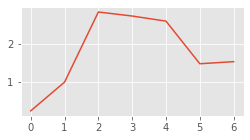

In [2]:
dataset = P53Data()

num_genes = dataset[0][1].shape[1]
num_tfs = 1

t_inducing = torch.linspace(f64(0), f64(1), 5, dtype=torch.float64).reshape((-1, 1))
t_observed = torch.linspace(f64(0), f64(1), 7).view(-1)

m_observed = dataset[0][1].transpose(0, 1)
print(m_observed.shape)
plt.figure(figsize=(4, 2))
plt.plot(dataset[0][1][:, 0])


In [3]:
#ExponentialLFM
model = SingleLinearLFM(num_genes, num_tfs,
                        t_inducing, dataset, extra_points=2,
                        fixed_variance=dataset.variance)
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
trainer = TranscriptionalTrainer(model, optimizer, dataset)

C:\Users\Jacob\Documents\proj\reggae\reggae\gp\variational\models.py:37: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.inducing_inputs = Parameter(torch.tensor(t_inducing), requires_grad=False)


### Outputs prior to training:

C:\Users\Jacob\Documents\proj\reggae\reggae\plot\variational_plotters.py:99: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(plotnum)


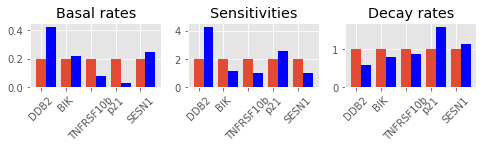

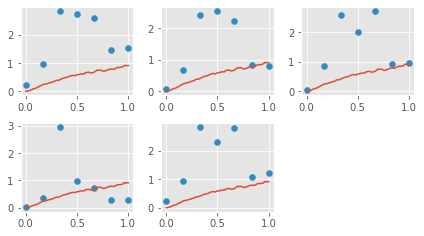

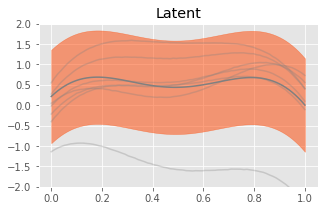

In [4]:
plotter = Plotter(model, dataset.gene_names, t_inducing)
plotter.plot_kinetics()

t_predict = torch.linspace(f64(0), f64(1), 80)
rtol = 1e-3
atol = rtol/10

model_kwargs = {
    'rtol': rtol, 'atol': atol,
    'num_samples': 1
}

plotter.plot_outputs(t_predict, t_scatter=t_observed,y_scatter=m_observed, model_kwargs=model_kwargs)
plotter.plot_latents(t_predict)

In [ ]:
tol = 1e-5
import time
start = time.time()

# trainer = Trainer(optimizer)
output = trainer.train(20, rtol=tol, atol=tol/10,
                       report_interval=1, plot_interval=5, num_samples=1)
end = time.time()
print(end - start)

calcing elbo
backward
Epoch 31/50 - Loss: 34.46 (25.51 8.95)
	 b: 1.30 d 1.30 s: 3.63 λ: 0.114
calcing elbo
backward
Epoch 32/50 - Loss: 33.94 (25.26 8.68)
	 b: 1.31 d 1.31 s: 3.67 λ: 0.110
calcing elbo
backward
Epoch 33/50 - Loss: 33.50 (25.11 8.39)
	 b: 1.33 d 1.32 s: 3.71 λ: 0.107
calcing elbo
backward
Epoch 34/50 - Loss: 32.74 (24.67 8.07)
	 b: 1.34 d 1.33 s: 3.75 λ: 0.104
calcing elbo
backward


### Outputs after training

C:\Users\Jacob\Documents\proj\reggae\reggae\plot\variational_plotters.py:99: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(plotnum)


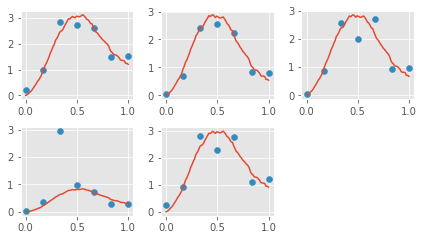

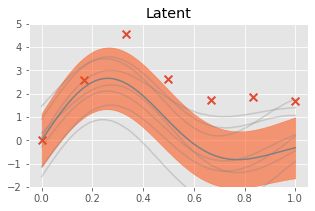

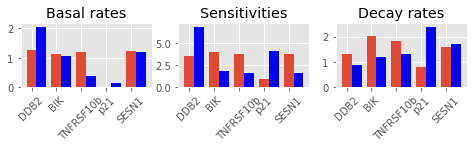

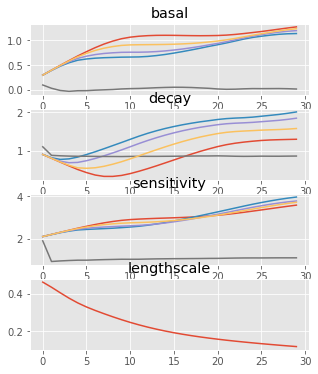

In [6]:
tol = 1e-6
# plotter = Plotter(model, dataset.gene_names, t_inducing)

# plot_losses(trainer)
plotter.plot_outputs(t_predict, t_scatter=t_observed,y_scatter=m_observed, model_kwargs=model_kwargs)
plotter.plot_latents(t_predict, ylim=(-2, 5), plot_barenco=True, plot_inducing=False)
plotter.plot_kinetics()
plotter.plot_convergence(trainer)

In [ ]:
save(model, 'variational_linear')

In [ ]:
model = load('variational_linear', SingleLinearLFM, num_genes, num_tfs, t_inducing, t_observed)
optimizer = torch.optim.Adam(model.parameters(), lr=0.2)
trainer = Trainer(model, optimizer, (t_observed, m_observed))